In [ ]:
import numpy as np

In [ ]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [ ]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0


In [ ]:
# Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)



In [ ]:
## work for task 2!
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    print(f"For p1 = {p1}:")
    print("   Error in market clearing condition 1:", eps1)
    print("   Error in market clearing condition 2:", eps2)



In [ ]:
## we might need to add somehow walras equilibrium 
def calculate_excess_demand(model, p1):
    # Calculate demands for goods 1 and 2 for both agents
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    
    # Calculate excess demand for goods 1 and 2
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1-model.par.w1A))
    excess_demand_2 = xA2 + xB2 - (model.par.w2A + (model.par.w2A))
    
    return excess_demand_1, excess_demand_2

def find_equilibrium_price(model, num_steps=1000, tolerance=1e-6):
    # Initialize variables to track equilibrium price and total excess demand
    equilibrium_price = None
    min_excess_demand = float('inf')
    
    # Iterate through a range of possible prices
    for i in range(0, np.inf):
        
        # Calculate excess demand at the current price
        excess_demand_1, excess_demand_2 = calculate_excess_demand(model, p1)
        
        # Calculate total excess demand
        total_excess_demand = abs(excess_demand_1) + abs(excess_demand_2)
        
        # Update equilibrium price if total excess demand is lower
        if total_excess_demand < min_excess_demand:
            min_excess_demand = total_excess_demand
        if p1 > 0: 
            equilibrium_price = p1
        
        # Check for convergence based on tolerance
        if total_excess_demand < tolerance:
            break
    
    return equilibrium_price


p1 = np.arange(0,100)
# Call the function to find the equilibrium price
equilibrium_price = calculate_excess_demand(model, p1)
if equilibrium_price is not None:
    print("Equilibrium price:", equilibrium_price)
else:
    print("Equilibrium price not found.")



In [ ]:
import numpy as np

def calculate_excess_demand(model):
    p1_range = np.arange(0.00001, 10000)
    for p1 in p1_range: 
        xA1, xA2 = model.demand_A(p1)
        xB1, xB2 = model.demand_B(p1)
    
        excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
   # excess_demand_2 = xA2 + xB2 - (model.par.w2A + (1 - model.par.w2A))
    
    return excess_demand_1
#p1_range = np.arange(0.00001, 10000)
print(calculate_excess_demand(model))

In [ ]:

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
    print(p1)
        #total_excess_demand = abs(excess_demand_1)
        
    #    if excess_demand_1 < min_excess_demand:
    #        min_excess_demand = excess_demand_1
    #        equilibrium_price = p1
    #    
    #    if excess_demand_1 < tolerance:
    #        break
    #
    #return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 10000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


In [ ]:
## das ergebnis von aufgabe 3 sollte 0.94 sein
import numpy as np

def calculate_excess_demand(model, p1):
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
    return excess_demand_1

print(calculate_excess_demand(model, 20))

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
        if excess_demand_1 < min_excess_demand:
            min_excess_demand = excess_demand_1
            equilibrium_price = p1
        if excess_demand_1 < tolerance:
            break
    return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 1000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


In [ ]:
## other approach 
P1 = np.linspace(0.5, 2.5, N)
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    epsilon_1.append(model.check_market_clearing(p1)[0])
    epsilon_2.append(model.check_market_clearing(p1)[1])
print(epsilon_1)
print(epsilon_2)

for e1, e2 in zip(epsilon_1, epsilon_2):
    if e1 == e2: 
        print("Common excess demand:", p1) 
    else: 
        print("market equilibrium price not found")



0.0009523809523811488
0.0009009009009011137


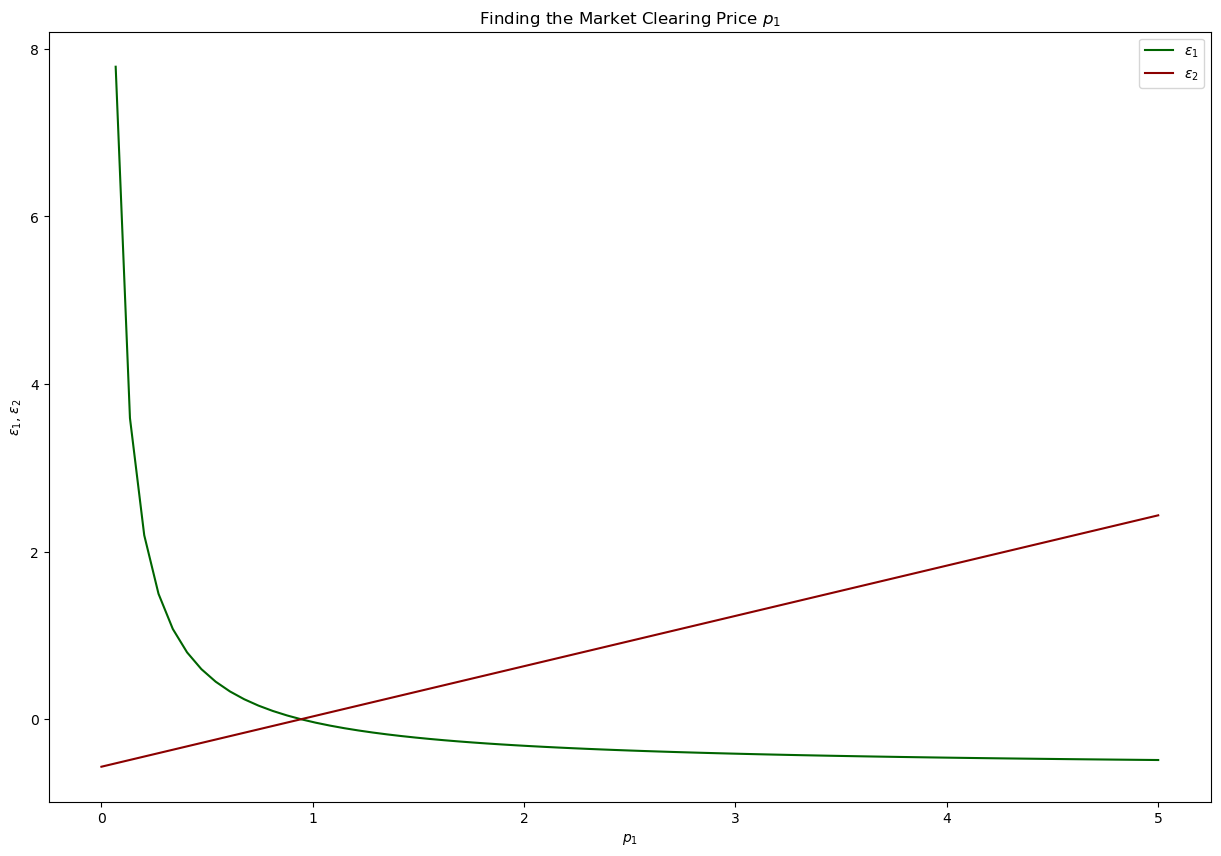

Intersection point: 0.9324324324324325


In [121]:
### DOING IT GRAPHICALLY
N  = 75
import matplotlib.pyplot as plt
P1 = np.linspace(0, 5, N)

# Calculate market clearing errors for each p1 in P1
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1) ## add 
    epsilon_2.append(eps2)

print(np.min(np.abs(epsilon_1)))
print(np.min(np.abs(epsilon_2)))


# Plotting
plt.figure(figsize=(15, 10))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
plt.legend()
plt.show()


## for which p1 do we get the intersection? 
# Find the point of intersection
# Find the point of intersection
intersection_point = None
for i in range(1, len(P1)):
    if (epsilon_1[i] > 0 and epsilon_2[i] < 0) or (epsilon_1[i] < 0 and epsilon_2[i] > 0):
        intersection_point = 1-P1[i]
    
        break  # Exit the loop after the first intersection is found since there is only market clearing price

print("Intersection point:", intersection_point)

In [ ]:
## task 4 
## use either grid search or numerical optimizer!! 
## starting with a). 
## WE WANT TO MAXIMIZE THE UTILITY OF PERSON A WHEN ONLY PRICES IN P1 CAN BE CHOSEN 
# from Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)
type(P1)



In [ ]:
model.negative_utility_A(5)

In [125]:
# Define the initial guess
x0 = [0.5, 0.5]  # Initial guess for x_B
negative_utility = -np.inf
value = []
x1_0 = []
x2_0 = []
p_solution = np.nan

# from Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)


for p1 in P1: 
     x1B, x2B = model.demand_B(p1) 
     #if 1 - x1 >= 0 and 1-x2 >= 0: 
     #if 1 - x1B >= 0 and 1-x2B >= 0: 
     if 1 - x1B >= 0 and 1-x2B >= 0:
          x1A = 1 - x1B 
          x2A = 1 - x2B
          if 1-x1A >= 0 and 1-x2A >= 0: 
               utility_A_now = model.utility_A(x1A, x2A)
               if utility_A_now > negative_utility: 
                    negative_utility = utility_A_now
          #value.append(negative_utility)
                    x1_0.append(x1A)
                    x2_0.append(x2A)
                    p_solution = p1


print(negative_utility)
print(x1_0) ## this is a list 
print(x2_0) ## this is a list
print(p_solution)
print(model.demand_A(p_solution))



[]
0.6336162385929179
[0.0227848101265824, 0.062068965517241614, 0.097858319604613, 0.12943654555028972, 0.15959595959595985, 0.18738476467734133, 0.21215521271622273, 0.23603603603603618, 0.2582355497609735, 0.2781841109709965, 0.29756097560975625, 0.3157024793388431, 0.33211149293623543, 0.3481481481481483, 0.3632506292700468, 0.37698495977614555, 0.39047619047619053, 0.4032439589539887, 0.41490803484995176, 0.42641509433962277, 0.4373505059797609, 0.4473794549266249, 0.4573099415204679, 0.466780919737218, 0.47549594858899147, 0.4841530054644809, 0.49243517775995727, 0.5000785545954439, 0.5076923076923078, 0.5149962321024869, 0.5217541266321755, 0.5285024154589373, 0.5349917081260366, 0.5410095371016517, 0.5470319634703198, 0.5528356870656805, 0.5582286847323199, 0.5636363636363637, 0.5688576898532227, 0.5737183511194811, 0.5786008230452676, 0.5833232139243069, 0.5877266387726638, 0.5921568627450982, 0.5964485620536577, 0.6004563605248145, 0.604494382022472, 0.6084117321527394, 0.612

In [141]:
## solution petra: 0.953
negative_utility = -np.inf
value = []
x1_0 = []
x2_0 = []
p_solution = np.nan

N = 75  ## from task
P1 = []
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)


for p1 in P1: 
    x1B, x2B = model.demand_B(p1) 
    x1A = 1 - x1B 
    x2A = 1 - x2B
    utility_A_now = model.utility_A(1-x1B, 1-x2B)
    if utility_A_now > negative_utility: 
        negative_utility = utility_A_now
        x1_0.append(x1A)
        x2_0.append(x2A)
        p_solution = p1

print("Maximum Utility for A:", negative_utility)
print("Optimal x1 for A:", x1_0)
print("Optimal x2 for A:", x2_0)
print("Optimal price:", p_solution)
print("Demand for A at optimal price:", model.demand_A(p_solution))

[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]
Maximum Utility for A: 0.6336162385929179
Optimal x1 for A: [0.0227848101265824, 0.062068965517241614, 0.097858319604613, 0.12943654555028972, 0.15959595959595985, 0.18738476467734133, 0.21215521271622273, 0.23603603603603618, 0.2582355497609735, 0.2781841109709965, 0.29756097560975625, 0.3157024793388431, 0.33211149293623543, 0.3481481481481483, 0.3632506292700468, 0.37698495977614555, 0.39047619047619053, 0.4032439589539887, 0.41490803484995176, 0.42641509433962277, 0.4373505059797609, 0.4473794549266249, 0.4573099415204679, 0.4

In [145]:
for p1 in P1: 
     x1B, x2B = model.demand_B(p1) 
     if 1 - x1B >= 0 and 1 - x2B >= 0:
          x1A = 1 - x1B 
          x2A = 1 - x2B
          print("x1A:", x1A)
          print("x2A:", x2A)
          if 1 - x1A >= 0 and 1 - x2A >= 0:
               utility_A_now = model.utility_A(x1A, x2A)
               print("Utility for A:", utility_A_now)
               if utility_A_now > negative_utility: 
                    negative_utility = utility_A_now
                    x1_0.append(x1A)
                    x2_0.append(x2A)
                    p_solution = p1

print(p_solution)
print(model.demand_A(p_solution))


x1A: 0.0227848101265824
x2A: 0.7298
Utility for A: 0.22980053950806573
x1A: 0.062068965517241614
x2A: 0.728
Utility for A: 0.32041469224772584
x1A: 0.097858319604613
x2A: 0.7262
Utility for A: 0.37230889678760876
x1A: 0.12943654555028972
x2A: 0.7244666666666666
Utility for A: 0.40803546299855636
x1A: 0.15959595959595985
x2A: 0.7226666666666666
Utility for A: 0.43681677975714284
x1A: 0.18738476467734133
x2A: 0.7208666666666667
Utility for A: 0.46006026138977724
x1A: 0.21215521271622273
x2A: 0.7191333333333334
Utility for A: 0.4787302260078413
x1A: 0.23603603603603618
x2A: 0.7173333333333334
Utility for A: 0.4952298102127464
x1A: 0.2582355497609735
x2A: 0.7155333333333334
Utility for A: 0.5094386878686699
x1A: 0.2781841109709965
x2A: 0.7138
Utility for A: 0.5213889258910739
x1A: 0.29756097560975625
x2A: 0.712
Utility for A: 0.5323271952460383
x1A: 0.3157024793388431
x2A: 0.7101999999999999
Utility for A: 0.542017251357126
x1A: 0.33211149293623543
x2A: 0.7084666666666666
Utility for A: 0.

In [ ]:

### 4b 
p = 0
### 4b 
## use solver since P1 needs to positve 
from scipy import optimize

def constraint_p(p):
    return p  # This ensures that p is non-negative

#def constraints(p):
 #   x1A, x2A = model.demand_A(p)
#   x1B, x2B = model.demand_B(p)
#  return [x1A + x1B - 1, x2A + x2B - 1, p]  # Ensuring demands sum up to 1 and p is non-negative

constraints ={'type': 'ineq', 'fun': constraint_p} ## adding constraint for p 
## we have to somehow add that x1_A and x2_A need to be between 0 and 1 and x1_A + x1_B sums to 1 as well as
## as x2_A + x2_B = 1 

## bounds for solutions
bounds = [(0,None)] ## non negative price 

# c. call solver, use SLSQP
initial_guess = 1
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
model.negative_utility_A, initial_guess, bounds = bounds,
method='SLSQP',constraints= constraints)

p_optimum = sol_case2.x
print(p_optimum) ## optimal price 
print(model.demand_A(p_optimum)) ## can this really be?
print(model.demand_B(p_optimum))
print(model.negative_utility_A(p_optimum))




In [ ]:
## task 5a 
# code for solving the model 
## this code is mainly from task 1!
par = model.par
parameters = model.par
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))

#print(pareto_improvements)

utility_start = -50
x1_start = 0
x2_start = 0
x_start = [0,0]
## here you solve the model 
for x in pareto_improvements: 
    if model.utility_A(x[0],x[1]) > utility_start: 
        utility_start = model.utility_A(x_start[0], x_start[1])
        x_start[0] = x[0]
        x_start[1] = x[1]

print(x_start) ## optimal allocation 
#print(x2_start)
print(model.utility_A(x_start[0], x_start[1])) ## maximized utility 

In [ ]:
## 5b 
## for consumer B needs to be as well off as with his endowment
constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(model.par.w1A, model.par.w2A)})
## bounds for solutions
bounds = ((0, 1), (0, 1)) 

# c. call solver, use SLSQP
initial_guess = [0.5, 0.5]
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
    model.negative_utility_A_5b, initial_guess,
    method='SLSQP', bounds=bounds, constraints=constraints)

x1_optimal = sol_case2.x[0]
x2_optimal = sol_case2.x[1]
print(sol_case2.x[0]) ## optimal amount for person A of good 1
print(sol_case2.x[1]) ## optimal amount for person A of good 2
print(model.utility_A(x1_optimal, x2_optimal))

In [ ]:
b = [0.5,1]
model.aggregate_utility(b)

In [ ]:
## task 6a 
# Define the objective function to maximize aggregate utility 
## better to define this inside the exchange economy 
#def aggregate_utility(x):
 #   xA1, xA2 = x
 #   return -(model.utility_A(xA1, xA2) + model.utility_B(1 - xA1, 1 - xA2))

# Define the constraints for xA1 and xA2
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]})

# Bounds for solutions
bounds = ((0, 1), (0, 1)) ## both can only be between 0 and 1 

# Call the solver, use SLSQP
initial_guess = [0.5, 0.5]

sol = optimize.minimize(model.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Unpack solution
xA1_optimal = sol.x[0]
xA2_optimal = sol.x[1]
utility_A = model.utility_A(xA1_optimal, xA2_optimal)
utility_B = model.utility_B(1 - xA1_optimal, 1 - xA2_optimal)

# Print the solution
print("Optimal Allocation:")
print("xA1:", xA1_optimal)
print("xA2:", xA2_optimal)
print("xB1:", 1-xA1_optimal)
print("xB2:", 1-xA2_optimal)
print("Utility for A:", utility_A)
print("Utility for B:", utility_B)

In [ ]:
## more for task 7 + 8

import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate the set W with 50 elements
omega_1 = np.random.rand(50,1)
omega_2 = np.random.rand(50,1)

# Plotting setup
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Axis labels and inverted axes for B
ax_A.set_xlabel("$\\omega_1$")
ax_A.set_ylabel("$\\omega_2$")


ax_A.scatter(omega_1, omega_2, color='blue', label='Pareto Improvements', s=10)